#  **Regresion Logistica**
En estadística, la regresión logística es un tipo de análisis de clasificación utilizado para predecir el resultado de una variable categórica (una variable que puede adoptar un número limitado de categorías) en función de las variables independientes. Es útil para modelar la probabilidad de un evento ocurriendo en función de otros factores.

La regresión logística unidimensional puede usarse para tratar de correlacionar la probabilidad de una variable cualitativa binaria (asumiremos que puede tomar los valores reales "0" y "1") con una variable escalar x. La idea es que la regresión logística aproxime la probabilidad de obtener "0" (no ocurre cierto suceso) o "1" (ocurre el suceso) con el valor de la variable explicativa x.



Fuente: [Wikipedia](https://es.wikipedia.org/wiki/Regresi%C3%B3n_log%C3%ADstica)



Forma general de la funcion de regresion logistica.

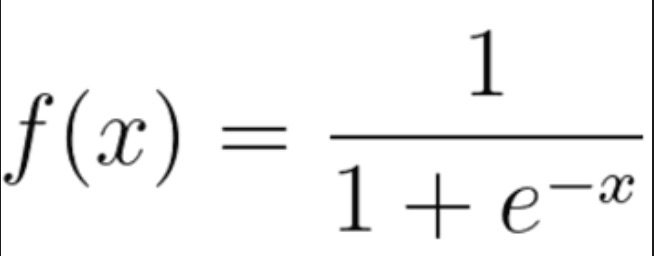

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return (1/(1+np.exp(-z)))

T = 20

z = np.arange(-T,T, 0.1)

plt.figure(figsize=(10, 4))
plt.axvline(0.0,color='k')
plt.axhline(0.0,ls='dotted', color='k')
plt.axhline(1.0,ls='dotted', color='k')
plt.axhline(0.5,color='k')
plt.plot(z,sigmoid(z))
plt.ylim(-.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi(z)$')
plt.suptitle('Capacitacion IA/E.A. Funcion logistica Sigmoide')
plt.show()




---



# **Ejercicio**
# **Supervivencia en el Titanic**

Fuente de los datos: [Kaggle](https://www.kaggle.com/)

In [ ]:
import pandas as pd
datos = pd.read_csv("train.csv")

In [ ]:
# Set de datos sobre el undimiento del Titanic
# https://www.kaggle.com/c/titanic/data

# Descripcion de Columnas:
# survival  Si sobrevio a la tragedia /	0 = No, 1 = Yes
# pclass    Clase de boleto comprado /	1 = 1st, 2 = 2nd, 3 = 3rd
# sex       Sexo
# Age       Edad en años
# sibsp     Número de hermanos / cónyuges a bordo del Titanic
# parch     Número de padres / hijos a bordo del Titanic
# ticket    Número de ticket
# fare      Precio del boleto
# cabin     Número de cabina
# embarked  Puerto de embarque / C = Cherbourg, Q = Queenstown, S = Southampton

datos.head()


In [ ]:
#Ver un poco mas de informacion

#datos.info()
datos.describe()

In [ ]:
#Graficamos sobrevivientes en general

import seaborn as sb
sb.countplot(x="Survived", data=datos)

In [ ]:
sb.countplot(x="Survived", data=datos, hue="Sex")

In [ ]:
#Sumar cantidad de datos NA

datos.isna().sum()

In [ ]:
#Graficamos una distribucion de las edades
#conocidas para ver el promedio de edad

sb.displot(x="Age", data=datos)

In [ ]:
datos["Age"]

In [ ]:
#Ver el valor promedio de edad

datos["Age"].mean()


In [ ]:
#Rellanamos los valores de Edad que no tienen datos
#con el promedio de edad de los pasajeros. fillna llena los vacio
#asi como drop los borra.
#Esto no modifica el set de datos original sino que me devuelve uno nuevo.
#Si despues de ejecutar fillna vuelvo a ejecutar datos["Age"] sigue son cambios.

datos["Age"].fillna(datos["Age"].mean())


In [ ]:
#Con esto modificamos el set de datos original
# Escribimos lo anterior para reemplazar nuestro arreglo datos[]
#datos["Age"] = datos["Age"].fillna(30)

datos["Age"] = datos["Age"].fillna(datos["Age"].mean())



In [ ]:
datos["Age"]

In [ ]:
datos.isna().sum()

In [ ]:
#Eliminamos las columna Cabin ya que no seria relevante para el analisis
#axis=1 es para decirle que es una columna.

datos = datos.drop(["Cabin"], axis=1)


In [ ]:
datos["Embarked"].value_counts()

In [ ]:
# Como quedan unos pocos datos sin determinar puerto de embarque
# Diretamente los eliminamos por completo

datos = datos.dropna()


In [ ]:
datos.isna().sum()

In [ ]:
datos.head()

In [ ]:
#Elmininamos Nombre, Id y numero de Ticket por no se relevante
#axis=1 para indicar que es una columna

datos = datos.drop(["Name", "PassengerId", "Ticket"], axis=1)


In [ ]:
#Para convertir la columan sex en numerica puedo usar la funcion
#de Pandas get_dummies()
#Por el momento me esta devolviendo un set de datos nuevos y no estoy
#modificando el original

pd.get_dummies(datos["Sex"])

In [ ]:
#Dado que las columnas son mutuamente excluyentes
#puedo usar el parametro adicional drop_first=True
#Este eliminina la primera de las dos colunas, es decir
#la columna Female.
#Asi ayuda a no ser redundante con la informacion y previene
#un efecto denominado multicolineality, que produce que el
#modelo encuentre relaciones donde no deberia.

pd.get_dummies(datos["Sex"], drop_first=True)

In [ ]:
#Guardamos el resultado en una nueva variable

dummies_sex = pd.get_dummies(datos["Sex"], drop_first=True)

In [ ]:
#Agregamos una nueva columna que corresponde a los nuevos datos
#que creamos y eliminamos la columna Sex original.

datos = datos.join(dummies_sex)
datos = datos.drop(["Sex"], axis=1)

In [ ]:
sb.countplot(x="Survived", data=datos, hue="Embarked")

In [ ]:
#Mismo procedimiento que hicimos con Sex.
#Pero con tres columnas. Eliminamos la primera.
dummies_embarked = pd.get_dummies(datos["Embarked"], drop_first=True)

In [ ]:
#Mismo procedimiento que hicimos con Sex.
datos = datos.join(dummies_embarked)
datos = datos.drop(["Embarked"], axis=1)

In [ ]:
#Graficamos correlacion entre las variables.
#Grafico de calor, cmap indica la paleta de colores.

sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

In [ ]:
sb.countplot(x="Survived", data=datos, hue="Pclass")

In [ ]:
#Preparamos los datos para el entrenamiento
#Survived es nuestra variable independiente.

X = datos.drop(["Survived"], axis=1)
y = datos["Survived"]

In [ ]:
X

In [ ]:
#Separamos los datos en:
#X_entrenamiento
#X_prueba
#y_entrenamiento
#y_prueba
#Indicamos que porcentaje asignar a entrenamiento y prueba.

from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=.2)

In [ ]:
#Importamos modelo de regresion logistica.

from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_ent, y_ent)

In [ ]:
predicciones = modelo.predict(X_pru)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

In [ ]:
#Otra informacion de metricas de precision del modelos
#Para ampliar informacion leer en sklearn

from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

In [ ]:
#Matriz de confusion.
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

from sklearn.metrics import confusion_matrix

confusion_matrix(y_pru, predicciones)

In [ ]:
#Creo una matriz para visualizar con Pandas.
#Cuando el modelo predijo que NO, cuales de esos datos verdaderamento fueron NO
#Lo mimso para SI.

pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

In [ ]:
X.head()

In [ ]:
#Creo una persona hipotetica y se envio al modelo para ver
#si esa persona hubiera sobrevivido o no al Titanic.
#nueva_persona = [Pclass,Edad,SibSp,Parch,Costo,Masculino, Puerto_Q, Puerto_S]

nueva_persona = [2, 35, 0, 0, 30, 0, 0, 0]
prediccion = modelo.predict([nueva_persona])
if prediccion[0] == 1:
  print("Sobreviviste")
else:
  print("No sobreviviste")